In [1]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving IMDB Dataset.csv to IMDB Dataset.csv


In [2]:
import pandas as pd

df = pd.read_csv("IMDB Dataset.csv")
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


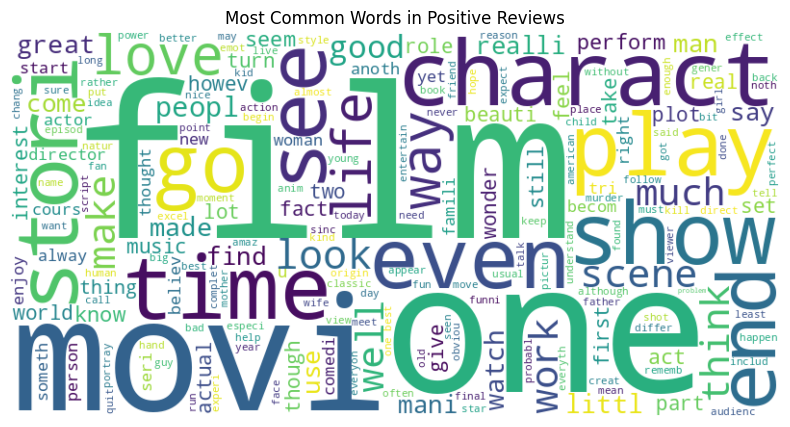

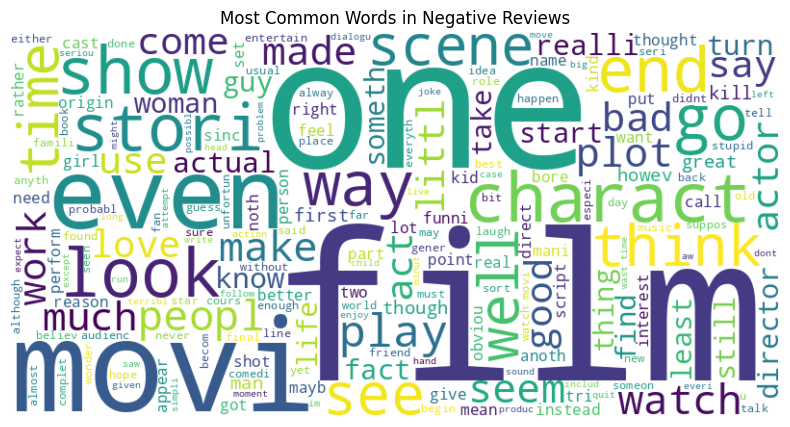


Naïve Bayes Performance:
Accuracy: 0.8461
F1 Score: 0.8483
RMSE: 0.3923

SVM Performance:
Accuracy: 0.8851
F1 Score: 0.8874
RMSE: 0.3390


In [3]:
#!pip install pandas numpy nltk matplotlib seaborn scikit-learn wordcloud
!pip install nltk

#Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import f1_score, mean_squared_error, accuracy_score

#Download necessary NLTK datasets
nltk.download("stopwords")
nltk.download('punkt_tab')
nltk.download("wordnet")


# Handle missing values
df["review"] = df["review"].fillna("")

# Text preprocessing function
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text)
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only letters
    text = text.lower()  # Convert to lowercase
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]  # Stemming & Lemmatization
    return " ".join(tokens)

# Apply preprocessing
df["cleaned_review"] = df["review"].apply(preprocess_text)

# Convert sentiment labels to binary (positive = 1, negative = 0)
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})

# Visualize most common words in positive vs negative reviews
def generate_wordcloud(sentiment_label, title):
    text = " ".join(df[df["sentiment"] == sentiment_label]["cleaned_review"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

generate_wordcloud(1, "Most Common Words in Positive Reviews")
generate_wordcloud(0, "Most Common Words in Negative Reviews")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df["cleaned_review"], df["sentiment"], test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#  Train Naïve Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)

# Train SVM model
svm_model = SVC(kernel="linear")
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"RMSE: {rmse:.4f}")

evaluate_model(y_test, nb_pred, "Naïve Bayes")
evaluate_model(y_test, svm_pred, "SVM")
